# **Linear Regression Model in Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

I am making this model for 1 feature, so the model will predict the slope and intercept. The model uses the batch gradient descent model to minimize the cost function.

Batch Gradient Descent:
- Compute the gradient of the cost function $J(\theta)$ using the entire dataset: $$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$
-Update the parameters using the computed gradient: $$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

In [2]:

class linearRegression:

  def __init__(self, learning_rate, iterations):
    self.learning_rate = learning_rate
    self.iterations = iterations

  def fit(self, X, Y):
    self.X = X
    self.Y = Y
    self.theta , self.costfunction, self.theta1000 = self.gradientDescent()

  def predict(self, X):
    return self.theta[0] + self.theta[1] * X

  def weights(self):
    return self.theta[0], self.theta[1]

  def gradientDescent(self):
    X_bias = np.c_[np.ones((len(self.X), 1)), self.X]
    m = len(X_bias)
    theta = np.zeros([2,1])
    costfunction = []
    theta1000 = []
    for i in range(self.iterations):
      hypothesis = np.dot(X_bias, theta)
      error = hypothesis - self.Y.reshape(-1,1)
      gradient = np.dot(X_bias.T, error) / m
      theta -= self.learning_rate * gradient

      if i % 1000 == 0:
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        print(f"Iteration {i}: Cost = {cost}")
        costfunction.append(cost)
        theta1000.append(theta.copy())
    return theta , costfunction, theta1000



The above class describes the Linear Regression Model. the gradientDescent method finds the weight and bias using batch gradient descent and prints the value of cost function every 1000th epoch. We can use the predict method to predict the value.

Let us try to use this model on the [Salary Dataset](https://www.kaggle.com/datasets/syamalapadala/salary-dataset) :

In [3]:
df = pd.read_csv("Salary_dataset.csv")
df["Salary"] /= 1000
df["YearsExperience"] *= 12
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,14.4,39.344
1,1,16.8,46.206
2,2,19.2,37.732
3,3,25.2,43.526
4,4,27.6,39.892


I will try to predict the salary (1000 dollars) based on months of experience

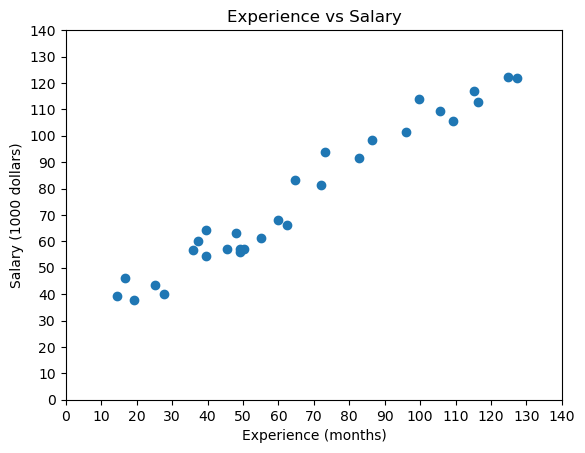

In [4]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.title('Experience vs Salary')
plt.xlabel('Experience (months)')
plt.ylabel('Salary (1000 dollars)')
plt.xticks(np.arange(0, 150, 10))
plt.yticks(np.arange(0, 150, 10))
plt.show()

In [5]:
model = linearRegression(learning_rate=0.0001, iterations=1000000)
model.fit(df['YearsExperience'].to_numpy(), df['Salary'].to_numpy())

Iteration 0: Cost = 3251.553638866667
Iteration 1000: Cost = 77.70600873525365
Iteration 2000: Cost = 75.1545343035502
Iteration 3000: Cost = 72.70794090756843
Iteration 4000: Cost = 70.36191730220347
Iteration 5000: Cost = 68.1123294606075
Iteration 6000: Cost = 65.95521328944719
Iteration 7000: Cost = 63.886767643608344
Iteration 8000: Cost = 61.903347628038055
Iteration 9000: Cost = 60.001458174921936
Iteration 10000: Cost = 58.17774788487813
Iteration 11000: Cost = 56.429003121315596
Iteration 12000: Cost = 54.75214234754991
Iteration 13000: Cost = 53.144210696697705
Iteration 14000: Cost = 51.60237476478189
Iteration 15000: Cost = 50.12391761787095
Iteration 16000: Cost = 48.706234004455574
Iteration 17000: Cost = 47.346825764625386
Iteration 18000: Cost = 46.043297427956496
Iteration 19000: Cost = 44.79335199235212
Iteration 20000: Cost = 43.59478687639846
Iteration 21000: Cost = 42.44549003810383
Iteration 22000: Cost = 41.34343625318043
Iteration 23000: Cost = 40.28668354631100

We can see above that the cost function has converged to a minimum value of about 15.63

In [6]:
bias , weights = model.weights()
print(f"Bias: {bias}\nWeights: {weights}")

Bias: [24.84820395]
Weights: [0.78749686]


So the Salary (in 1000 dollars) can be predicted by the formula :

$$ Salary = 0.787 * Months + 24.848
$$

Let us Plot the Best Fit Line

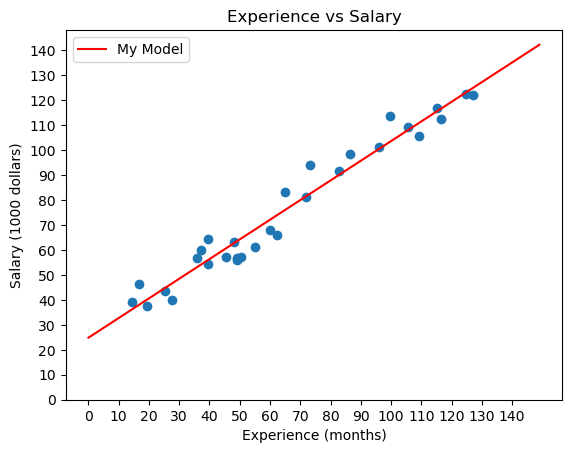

In [7]:
plt.scatter(df['YearsExperience'],df['Salary'])
X = np.array(range(0,150))
Y = bias + weights * X
plt.plot(X,Y,color = "red",label = "My Model")
plt.legend()
plt.title('Experience vs Salary')
plt.xlabel('Experience (months)')
plt.ylabel('Salary (1000 dollars)')
plt.xticks(np.arange(0, 150, 10))
plt.yticks(np.arange(0, 150, 10))
plt.show()

Mean Squared and Root Mean Squared Error:

In [8]:
Xe = df['YearsExperience'].to_numpy()
Ye = df['Salary'].to_numpy()
Ypred = []
for i in range(0,len(Xe)):
  Ypred.append(model.predict(Xe[i]))
Ypred = np.array(Ypred)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Ye, Ypred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Ye, Ypred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 31.270951722280937
Root Mean Squared Error: 5.592043608760659


Now I will use the built in Linear Regression model from sklearn.linear_model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
Model = LinearRegression()
Model.fit(df['YearsExperience'].to_numpy().reshape(-1,1),df['Salary'].to_numpy().reshape(-1,1))

LinearRegression()

In [11]:
slope = Model.coef_[0]
intercept = Model.intercept_
print(f"Slope (Weight): {slope}, Intercept (Bias): {intercept}")

Slope (Weight): [0.78749686], Intercept (Bias): [24.84820397]


The Weight and Bias is exactly the same as calculated by my model :)

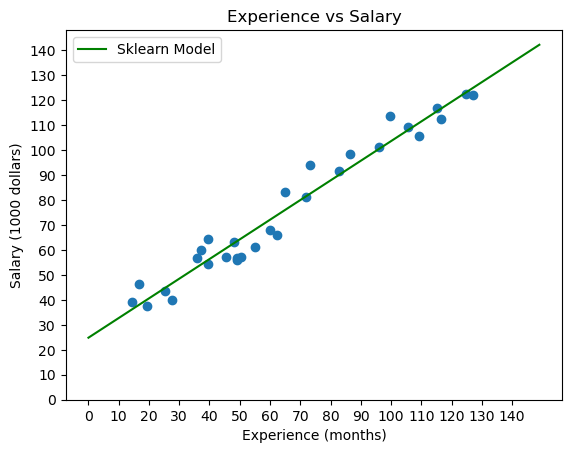

In [12]:
plt.scatter(df['YearsExperience'],df['Salary'])
X = np.array(range(0,150))
Y = bias + weights * X
Ysk = intercept + slope * X

plt.plot(X,Ysk,color = "green",label = "Sklearn Model")
plt.legend()
plt.title('Experience vs Salary')
plt.xlabel('Experience (months)')
plt.xticks(np.arange(0, 150, 10))
plt.yticks(np.arange(0, 150, 10))
plt.ylabel('Salary (1000 dollars)')
plt.show()

Here is another example on a more complex [dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?select=Housing.csv)

In [13]:
housing = pd.read_csv("Housing.csv")
housing["price"] /= 1000000
housing["area"] /= 1000

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13.300,7.42,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12.250,8.96,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12.250,9.96,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12.215,7.50,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11.410,7.42,4,1,2,yes,yes,yes,no,yes,2,no,furnished


I have scales the dataset down so that the cost function stays in limits.

In [14]:
Xh = housing['area'].to_numpy()
Yh = housing['price'].to_numpy()
HousingModel = linearRegression(learning_rate=0.0000001, iterations=1000000)
HousingModel.fit(Xh,Yh)

Iteration 0: Cost = 13.106916364659266
Iteration 1000: Cost = 13.033468485392333
Iteration 2000: Cost = 12.960490304262821
Iteration 3000: Cost = 12.887978817105678
Iteration 4000: Cost = 12.815931038970344
Iteration 5000: Cost = 12.744344003997863
Iteration 6000: Cost = 12.673214765298777
Iteration 7000: Cost = 12.60254039483179
Iteration 8000: Cost = 12.532317983283223
Iteration 9000: Cost = 12.462544639947224
Iteration 10000: Cost = 12.393217492606766
Iteration 11000: Cost = 12.324333687415384
Iteration 12000: Cost = 12.255890388779683
Iteration 13000: Cost = 12.18788477924258
Iteration 14000: Cost = 12.120314059367324
Iteration 15000: Cost = 12.053175447622237
Iteration 16000: Cost = 11.986466180266163
Iteration 17000: Cost = 11.920183511234727
Iteration 18000: Cost = 11.854324712027237
Iteration 19000: Cost = 11.788887071594372
Iteration 20000: Cost = 11.723867896226542
Iteration 21000: Cost = 11.659264509443018
Iteration 22000: Cost = 11.595074251881694
Iteration 23000: Cost = 11

In [15]:
biash, weightsh = HousingModel.weights()
weightsh*=1000
biash*=1000000
print(f"Bias: {biash}\nWeights: {weightsh}")

Bias: [165427.95803605]
Weights: [795.48448061]


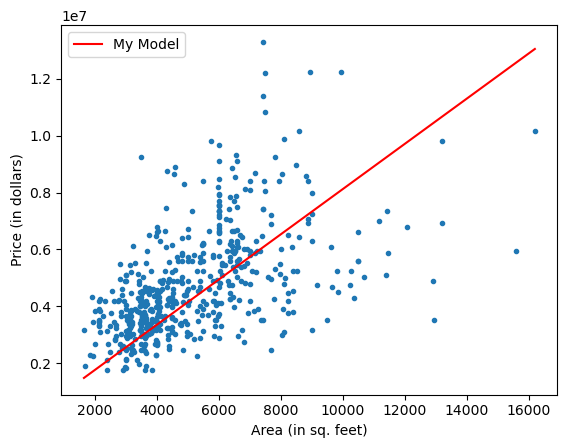

In [16]:
plt.scatter(housing['area']*1000,housing['price']*1000000,marker = ".")
X = np.linspace(min(housing['area']*1000),max(housing['area']*1000),100)
Y = biash + weightsh * X
plt.plot(X,Y,color = "red",label = "My Model")
plt.xlabel("Area (in sq. feet)")
plt.ylabel("Price (in dollars)")
plt.legend()
plt.show()

In [17]:
Ypredh = []
for i in range(0,len(Xh)):
  Ypredh.append(HousingModel.predict(Xh[i]))
Ypredh = np.array(Ypredh)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Yh, Ypredh)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Yh, Ypredh))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 28740126054.583244
Root Mean Squared Error: 169529.1304011887


Since the dataset is more scattered and i have only used one feature, the error is very high. I will use the Sklearn model next and add more features.

In [18]:
housing = housing.select_dtypes(include=['int', 'float'])
housing["price"]*=1000000
housing["area"]*=1000
housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000.0,7420.0,4,2,3,2
1,12250000.0,8960.0,4,4,4,3
2,12250000.0,9960.0,3,2,2,2
3,12215000.0,7500.0,4,2,2,3
4,11410000.0,7420.0,4,1,2,2


In [19]:
housingModel = LinearRegression()
housingModel.fit(housing.drop('price', axis=1), housing['price'])

LinearRegression()

In [20]:
weightsh = housingModel.coef_
biash = housingModel.intercept_
print(f"Bias: {biash:.2f}\nWeights: {weightsh}")

Bias: -145734.49
Weights: [3.31115495e+02 1.67809788e+05 1.13374016e+06 5.47939810e+05
 3.77596289e+05]


In [21]:
ypredhsk = housingModel.predict(housing.drop('price', axis=1))
mse = mean_squared_error(housing['price'], ypredhsk)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(housing['price'], ypredhsk))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1531008562668.398
Root Mean Squared Error: 1237339.3078167355


The Error is higher than my model after using all the other features, this shows that the dataset is more complex and Linear Regression is not the right method to predict the price for this dataset